# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

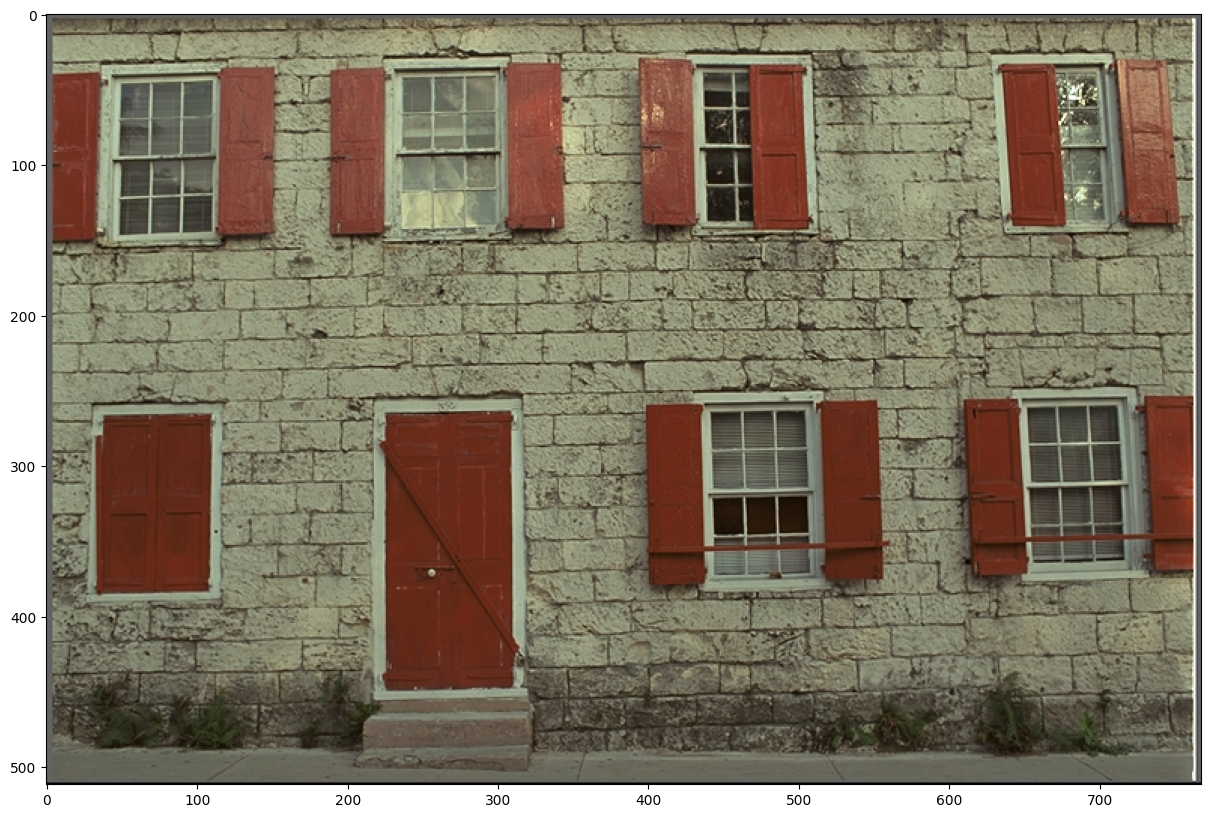

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

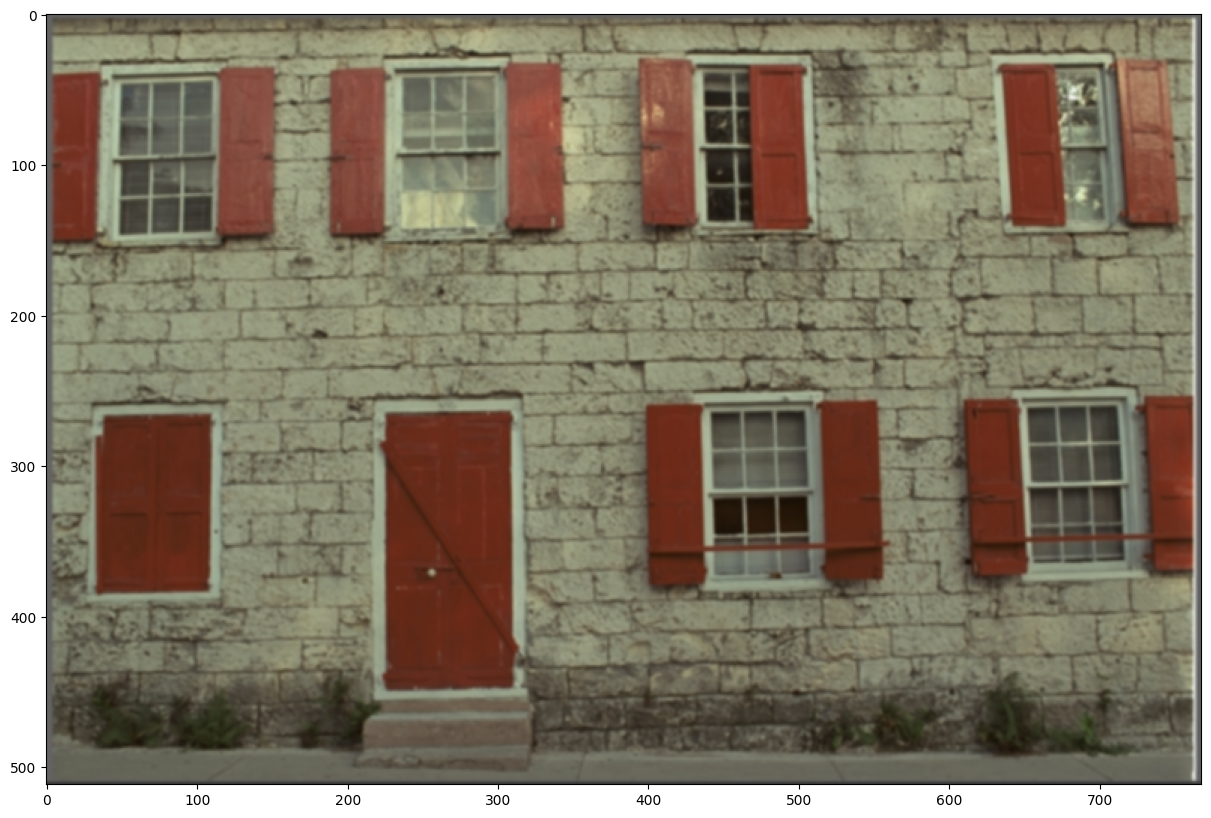

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=1)
plt.imshow(unsharp)

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img = img.astype(np.float32)
unsharp = unsharp.astype(np.float32)
diff = img - unsharp

(<Axes: title={'center': 'Sharpened 10'}>,
 Text(0.5, 1.0, 'Sharpened 10'))

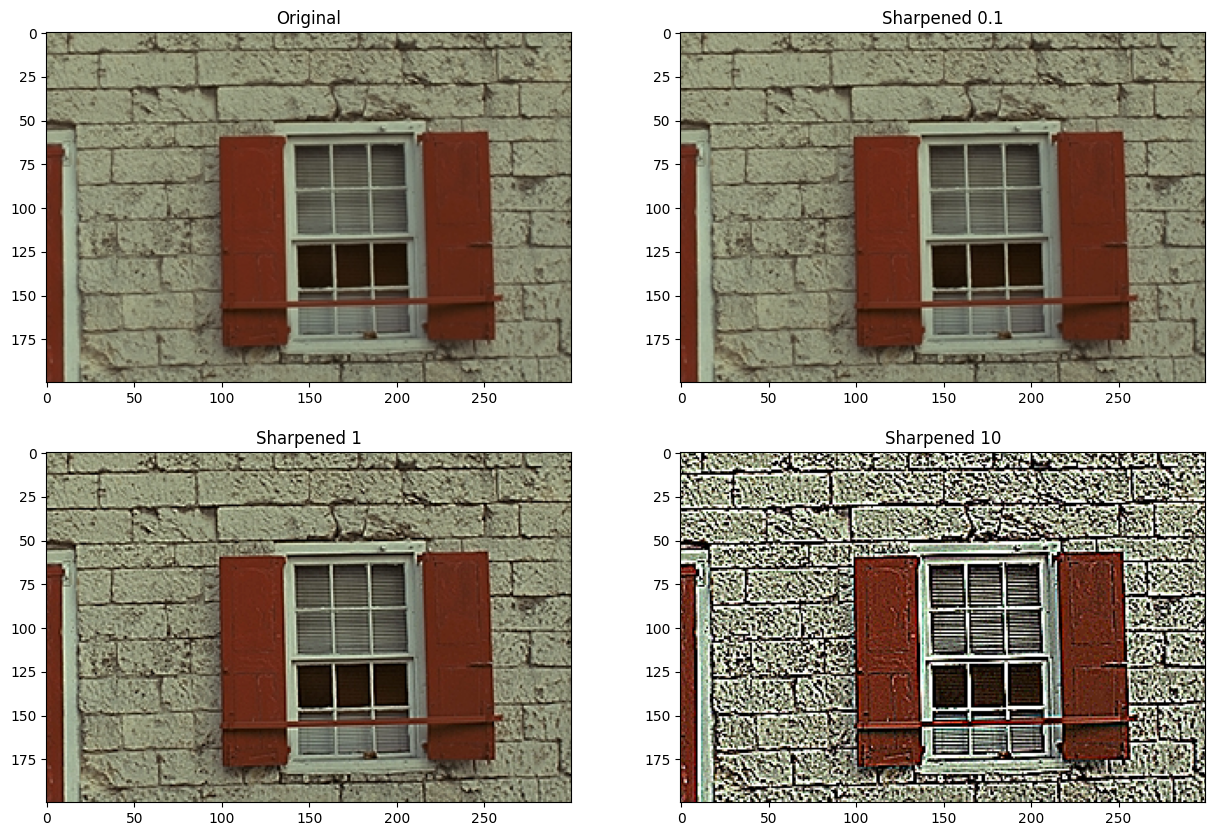

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened1 = img + diff * 0.1
sharpened1[sharpened1 < 0] = 0
sharpened1[sharpened1 > 255] = 255

sharpened2 = img + diff * 1
sharpened2[sharpened2 < 0] = 0
sharpened2[sharpened2 > 255] = 255

sharpened3 = img + diff * 10
sharpened3[sharpened3 < 0] = 0
sharpened3[sharpened3 > 255] = 255
plt.subplot(221), plt.imshow(img.astype(np.uint8)[200:400, 300:600, :]), plt.title('Original')
plt.subplot(222), plt.imshow(sharpened1.astype(np.uint8)[200:400, 300:600, :]), plt.title('Sharpened 0.1')
plt.subplot(223), plt.imshow(sharpened2.astype(np.uint8)[200:400, 300:600, :]), plt.title('Sharpened 1')
plt.subplot(224), plt.imshow(sharpened3.astype(np.uint8)[200:400, 300:600, :]), plt.title('Sharpened 10')

### Questions
* What is a good (reasonable) value for the `amount` parameter?

  Around 1
* What happens if it is too small?

  The image remains the same
* What happens if it is too large?

  Many noise appears